Importing necessary libraries and modules

In [1]:
import pandas as pd
import pylab as plt
import seaborn as sns
import numpy as np
from imblearn.under_sampling import RandomUnderSampler

Opening the file with the data

In [2]:
data=pd.read_csv('../../data/card_transdata.csv')

## Time to start exploring the data

In [3]:
data.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

## Columns and their descriptions:

**distance_from_home**: how far from home the transaction was made 

**distance_from_last_transaction**: how far from the last transcation the new transaction was 

**ratio_to_median_purchase_price**: ratio of purchase price of the transcation to the median of all purchase prices 

**repeat_retailer**: how many times the credit-card-holder purchased from the same retailer 

**used_chip**: was the chip used for the transaction? (0 for No 1 for Yes) 

**used_pin_number**: was the pin number used for the transaction? (0 for No 1 for Yes)

**online_order**: was it an online order? (0 for No 1 for Yes)

**fraud**: was it fraud or not? (0 for No 1 for Yes) 

In [4]:
data.shape

(1000000, 8)

In [5]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


We can see here that there are only numerical values, looks like there is no nulls. 

In [7]:
data.isnull().sum()  #confirming there are no nulls

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [8]:
data.duplicated().any()

False

No duplicated rows either 

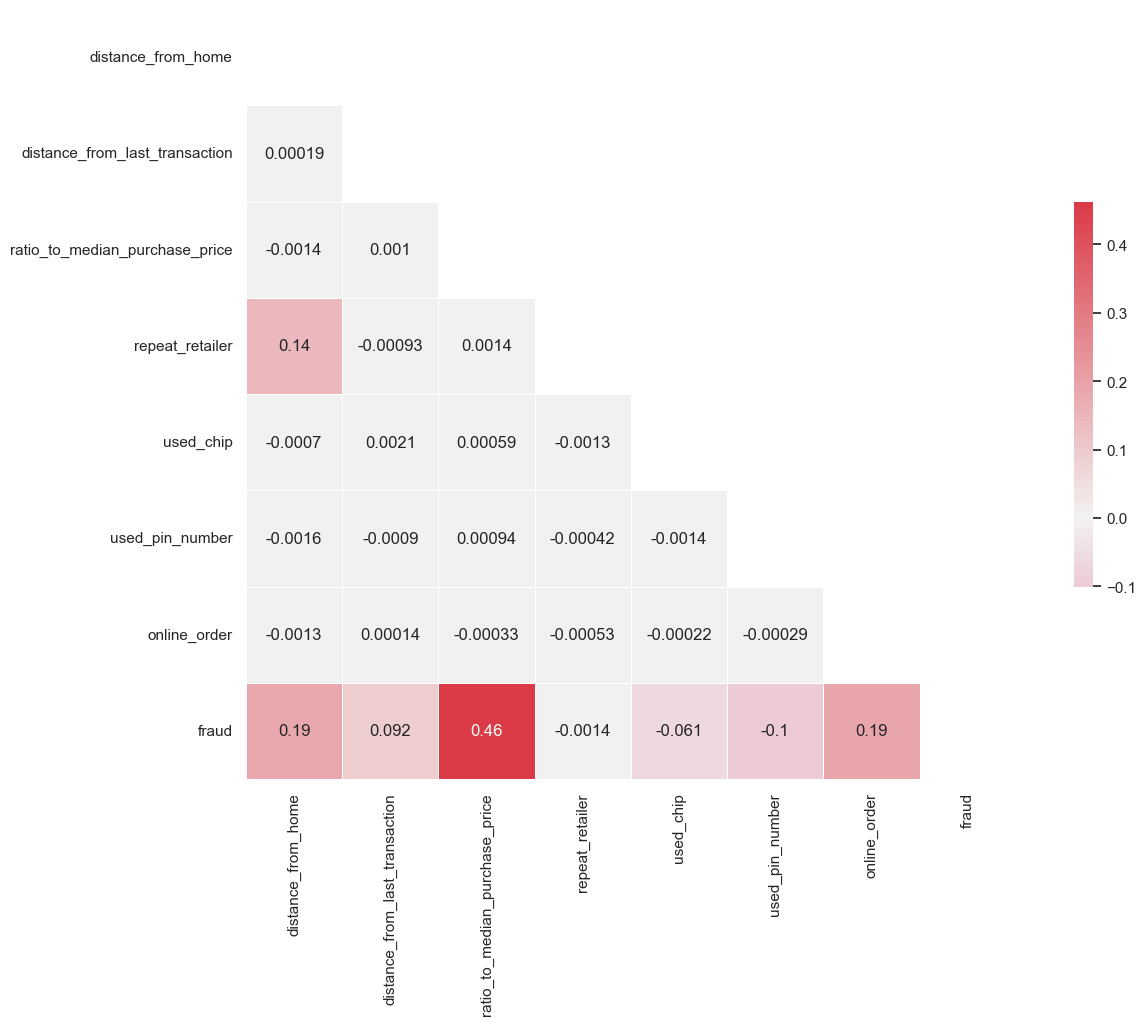

In [9]:
#correlations matrix
plt.figure(figsize=(15, 10))  

sns.set(style='white')    

mask=np.triu(np.ones_like(data.corr(), dtype=bool))    

cmap=sns.diverging_palette(0, 10, as_cmap=True)   


sns.heatmap(data.corr(),    
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

The goal of this project is to create a model that will predict fraud. Therefore my target is column 'fraud'. In the figure above are the correlations of the dataframe. I am particularly interested in the correlations between 'fraud' and the rest of the columns. The most correlated column to 'fraud' would be 'ratio_to_media_purchase_price' with 0.46 . Then 'distance_from_home' and 'online_order' seem to be the ones that follow. The column that has the least correlation to 'fraud' is 'repeat_retailer'.

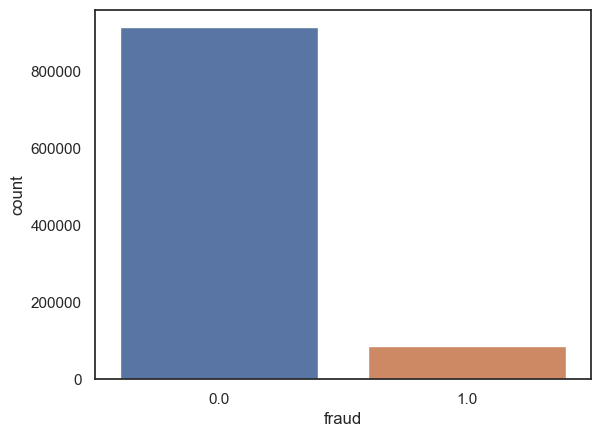

In [10]:
sns.countplot(x ='fraud', data = data)
 
plt.show()

In [12]:
data['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

As we can see above the are a lot more non-fraud cases than fraud. This is going to be an issue with my model since if I give it the data like this, it will tend to always say that cases are not fraud and it will probably have good metrics while doing so. Below I will try to create some balance between the fraud and non-fraud cases. 

In [13]:
def detect_outliers(list_columns, dataframe): 
    
    dicc_indices = {} 
    
    for col in list_columns:
        
        Q1 = np.nanpercentile(data[col], 25)
        Q3 = np.nanpercentile(data[col], 75)
        
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0:  
        
            dicc_indices[col] = (list(outliers_data.index)) 
        

    
    return dicc_indices 

In [14]:
list_columns=['distance_from_home', 'distance_from_last_transaction','ratio_to_median_purchase_price']
outliers_ind=detect_outliers(list_columns,data)
outliers_ind

{'distance_from_home': [12,
  15,
  16,
  20,
  30,
  33,
  37,
  39,
  54,
  69,
  73,
  75,
  92,
  112,
  125,
  126,
  133,
  150,
  156,
  163,
  174,
  196,
  205,
  212,
  220,
  231,
  235,
  243,
  252,
  256,
  258,
  261,
  267,
  275,
  288,
  289,
  331,
  365,
  393,
  409,
  412,
  419,
  430,
  441,
  469,
  491,
  503,
  513,
  520,
  528,
  535,
  542,
  558,
  563,
  567,
  568,
  569,
  592,
  604,
  608,
  612,
  658,
  667,
  671,
  691,
  693,
  709,
  712,
  745,
  759,
  764,
  771,
  774,
  775,
  783,
  793,
  806,
  808,
  818,
  827,
  829,
  833,
  836,
  859,
  860,
  864,
  879,
  893,
  899,
  930,
  932,
  948,
  977,
  981,
  982,
  996,
  1001,
  1017,
  1022,
  1033,
  1035,
  1044,
  1069,
  1071,
  1080,
  1094,
  1107,
  1110,
  1111,
  1124,
  1135,
  1142,
  1174,
  1176,
  1191,
  1193,
  1198,
  1201,
  1217,
  1221,
  1229,
  1235,
  1236,
  1239,
  1252,
  1259,
  1263,
  1274,
  1275,
  1288,
  1294,
  1310,
  1312,
  1336,
  1347,
  1355,

As you can see above there are quite a few outliers. We could replace them, delete them or keep them. In fraud prediction outliers are a lot of the times how fraud is predicted so it would seem better to keep them. I will try both ways and see what works the best. 

## Time to start preprocessing 

Now I will start preprocessing the data. I will preprocess it in various different ways, train the models with all these versions of the preprocessed data and choose the one that works the best. 

## Preprocessing 1: 
Keeping the outliers , keeping column repeat_retailer and downscaling the non-fraud cases to balance the fraud and non-fraud rows. I will also use standardscaler to standardize the data in preprocessing 1 but I will do that in notebook model since it has to be done in a later stage.

In [15]:
fraud_rows=data[data['fraud']==1.0]    #df for fraud cases

In [16]:
num_fraud = data['fraud'].value_counts()[1.0]    # number of fraud cases
num_fraud

87403

In [17]:
num_nonfraud = data['fraud'].value_counts()[0.0]   # number of non-fraud cases
num_nonfraud

912597

In [18]:
nonfraud_sample = data[data['fraud'] == 0.0].sample(num_fraud, random_state = 42) 
#getting a sample from non-fraud cases equal to the length of the fraud cases

In [19]:
nonfraud_sample.shape  #shape of the sample 

(87403, 8)

In [20]:
data_pp1 = pd.concat([fraud_rows,nonfraud_sample],axis = 0) #adding the sample and the fraud cases to a new dataframe


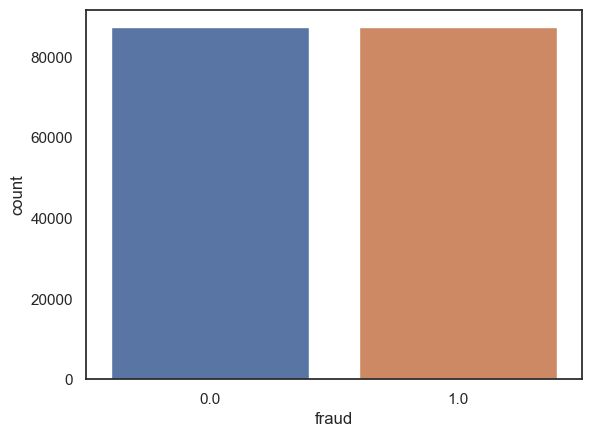

In [22]:
sns.countplot(x ='fraud', data = data_pp1)
 
plt.show()

In [21]:
data_pp1['fraud'].value_counts()   

1.0    87403
0.0    87403
Name: fraud, dtype: int64

Now the data is balanced

In [23]:
data_pp1.to_csv('../../data/data_pp1.csv', index=False)

## Preprocessing 2:
Removing the outliers , removing column repeat_retailer and upscaling the fraud cases to balance the fraud and non-fraud rows. I will also use max_min method to standardize the data in preprocessing s but I will do that in notebook model since it has to be done in a later stage.

In [24]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [30]:
data_pp2=data

In [31]:
data_pp2=data.drop('repeat_retailer', axis=1)  
#Dropping column repeat_retailer since it had a very low correlation to my target column

In [44]:
to_drop = list(outliers_ind.values())   #converting the dictionary of the outliers to a list of lists
ind_to_drop = [index for slist in to_drop for index in slist] # converting the list of lists to a list
ind_to_drop=set(ind_to_drop) # converting the list to a set (getting only the unique values)
len(ind_to_drop)  # there are a lot of outliers 

281250

In [45]:
data_pp2=data_pp2.drop(ind_to_drop)

In [47]:
data_pp2.shape   # the shape after dropping outliers and column repeat_retailer

(718750, 7)

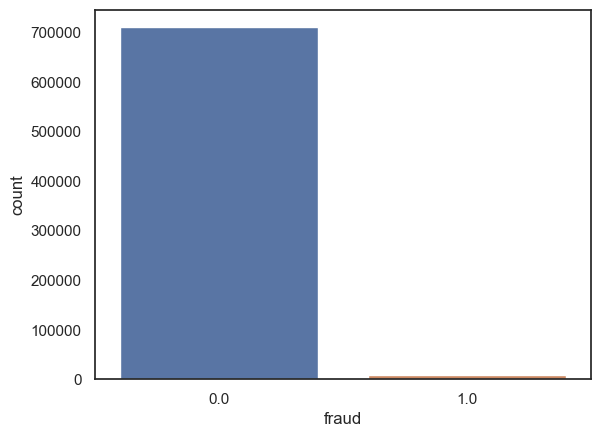

In [49]:
sns.countplot(x ='fraud', data = data_pp2)
 
plt.show()

In [50]:
data_pp2['fraud'].value_counts() 

0.0    709710
1.0      9040
Name: fraud, dtype: int64

Before removing the outliers there were 912597 non-fraud rows and 87403 fraud rows.

After removing the outliers there are 709710 non-fraud rows and 9040 fraud rows